In [1]:
import numpy as np
import matplotlib.pyplot as plt
import funciones_1 as fn1
import pandas as pd


In [2]:
fs = 5000
T = 0.1
f1 = 50
f2 = 100

t = np.linspace(0, T, int(fs*T), endpoint=False)
x1 = np.sin(2*np.pi*f1*t)
x2 = np.cos(2*np.pi*f2*t)

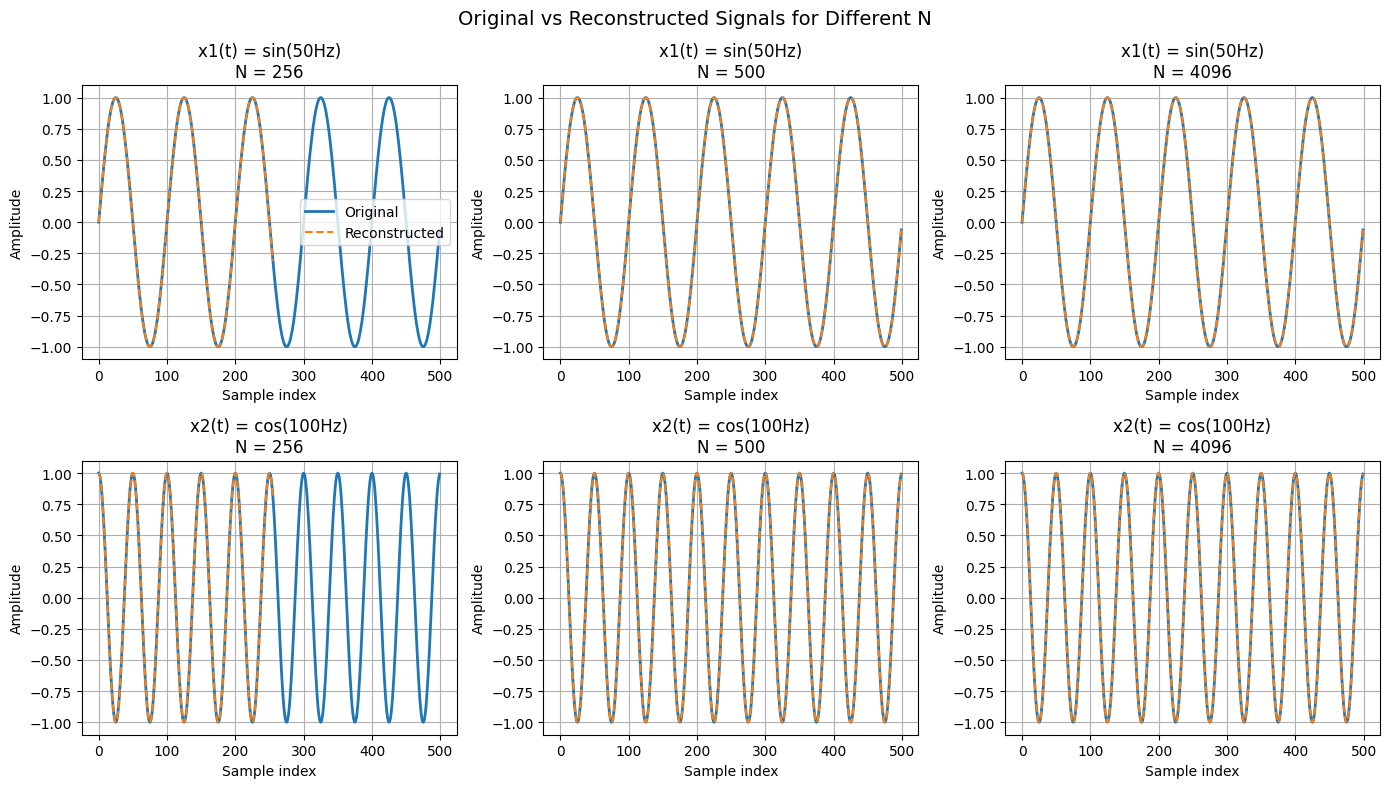

<Figure size 640x480 with 0 Axes>

In [3]:
N_values = [256, 500, 4096]
signals = [("x1(t) = sin(50Hz)", x1), ("x2(t) = cos(100Hz)", x2)]

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle("Original vs Reconstructed Signals for Different N", fontsize=14)

for row, (name, sig) in enumerate(signals):
    for col, N in enumerate(N_values):
        x_rec = fn1.reconstruct(sig, N)
        
        ax = axes[row, col]
        ax.plot(sig[:500], label="Original", linewidth=2)
        ax.plot(x_rec[:500], label="Reconstructed", linestyle="dashed")
        
        ax.set_title(f"{name}\nN = {N}")
        ax.set_xlabel("Sample index")
        ax.set_ylabel("Amplitude")
        ax.grid(True)
        
        if row == 0 and col == 0:
            ax.legend()

plt.tight_layout()
plt.show()
plt.savefig("figuras/original_vs_reconstructed_signals.png")

In [4]:
rows = []  

for N in N_values:
    M = fn1.compare_all_metrics(x1, fs, N)
    rows.append(M)

df = pd.DataFrame(rows)
df

,N,MSE,RMSE,MAXERR,SNR_dB,Corr,delta_f,f_peak,A_peak
0,256,2.393211e-32,1.547001e-16,4.440892e-16,313.104253,1.0,19.531250,58.593750,84.13774
1,500,2.840527e-32,1.685386e-16,5.551115e-16,312.455711,1.0,10.000000,50.000000,250.00000
2,4096,1.345701e-32,1.160044e-16,4.440892e-16,315.700213,1.0,1.220703,50.048828,249.86835


In [5]:
w_norm, X1 = fn1.spectral_analysis(x1, fs, 500, window_type="hann")
fn1.plot_spectrum(w_norm, X1, "x1(t) = sin(50 Hz), N=500, Hann")

w_norm, X2 = fn1.spectral_analysis(x2, fs, 500, window_type="hann")
fn1.plot_spectrum(w_norm, X2, "x2(t) = cos(100 Hz), N=500, Hann")


In [6]:
w_norm, X1 = fn1.spectral_analysis(x1, fs, 256, window_type="hann")
fn1.plot_spectrum(w_norm, X1, "x1(t), N=256, Hann")

w_norm, X2 = fn1.spectral_analysis(x2, fs, 256, window_type="hann")
fn1.plot_spectrum(w_norm, X2, "x2(t), N=256, Hann")


In [8]:
# N = 500 rectangular
w_norm, X1 = fn1.spectral_analysis(x1, fs, 500, window_type="rect")
fn1.plot_spectrum(w_norm, X1, "x1(t), N=500, Rectangular")

# N = 500 rectangular
w_norm, X2 = fn1.spectral_analysis(x2, fs, 500, window_type="rect")
fn1.plot_spectrum(w_norm, X2, "x2(t), N=500, Rectangular")

# N = 256 rectangular
w_norm, X1 = fn1.spectral_analysis(x1, fs, 256, window_type="rect")
fn1.plot_spectrum(w_norm, X1, "x1(t), N=256, Rectangular")

# N = 256 rectangular
w_norm, X2 = fn1.spectral_analysis(x2, fs, 256, window_type="rect")
fn1.plot_spectrum(w_norm, X2, "x2(t), N=256, Rectangular")
